In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 1. Riesgo de accidente cerebrovascular y hábitos de vida


## Cargando el Dataset: 'Healthcare Dataset Stroke Data'

In [3]:
# Cargamos dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Preprocesamiento de Dataset
Se seleccionaron las columnas: 'smoking_status', 'work_type' y 'avg_glucose_level'. Se calculó la media agrupando por las dos variables categóricas.
y se eliminaron los nulos 'Unknown' de 'smoking_status' (clean_subset). Finalmente mostramos el resultado numérico.

In [15]:
# Realizamos el pre-procesamiento
df_subset = df[['smoking_status', 'work_type', 'avg_glucose_level']]
g_subset = df_subset.groupby(['smoking_status', 'work_type'])['avg_glucose_level'].mean().reset_index()
clean_subset = g_subset[g_subset['smoking_status'] != 'Unknown']

# Resultado numérico
display(clean_subset)

,smoking_status,work_type,avg_glucose_level
5,formerly smoked,Govt_job,115.827820
6,formerly smoked,Private,111.202957
7,formerly smoked,Self-employed,116.871154
8,formerly smoked,children,87.777692
9,never smoked,Govt_job,109.301773
10,never smoked,Never_worked,97.871429
11,never smoked,Private,106.164327
12,never smoked,Self-employed,112.185408
13,never smoked,children,103.856296
14,smokes,Govt_job,102.075500


## Gráfico de barras
Creamos el gráfico de barras con eje x: 'work_type' y eje y: 'avg_glucose_level'

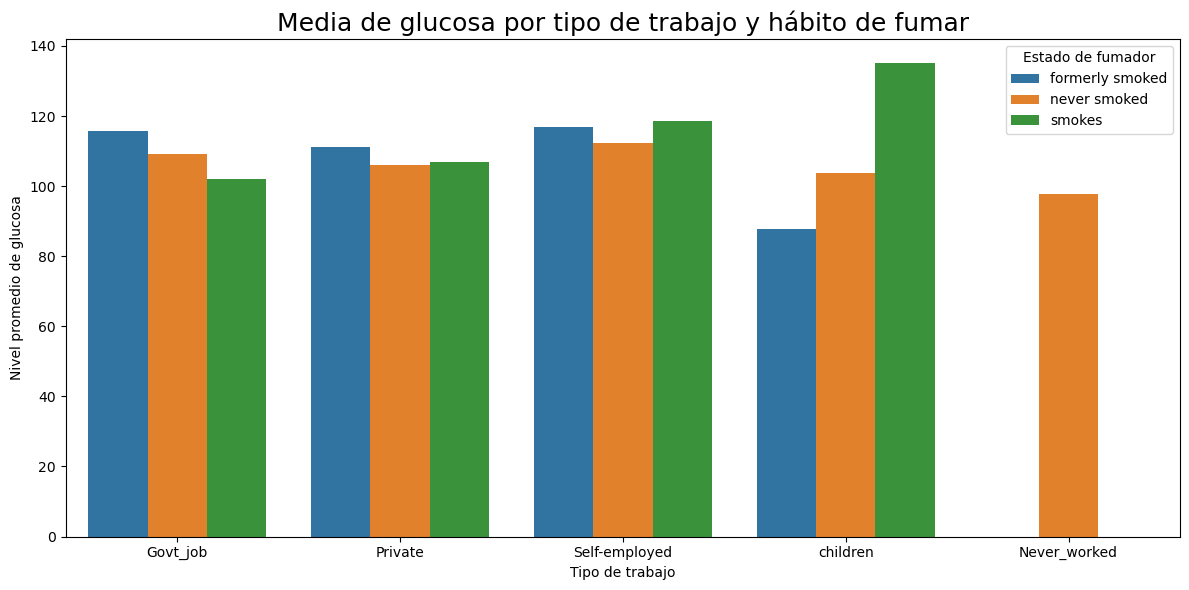

In [28]:
# Gráfico de Barras

plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=clean_subset,
    x='work_type',
    y='avg_glucose_level',
    hue='smoking_status'
)

plt.title('Media de glucosa por tipo de trabajo y hábito de fumar', fontsize=18)
plt.xlabel('Tipo de trabajo')
plt.ylabel('Nivel promedio de glucosa')
plt.legend(title='Estado de fumador')
plt.tight_layout()
plt.show()

## Heatmap
Primero se pivotó la tabla para que sea una matriz en 'heatmap_data'. Y generamos el heatmap utilizando seaborn con anotaciones numéricas.

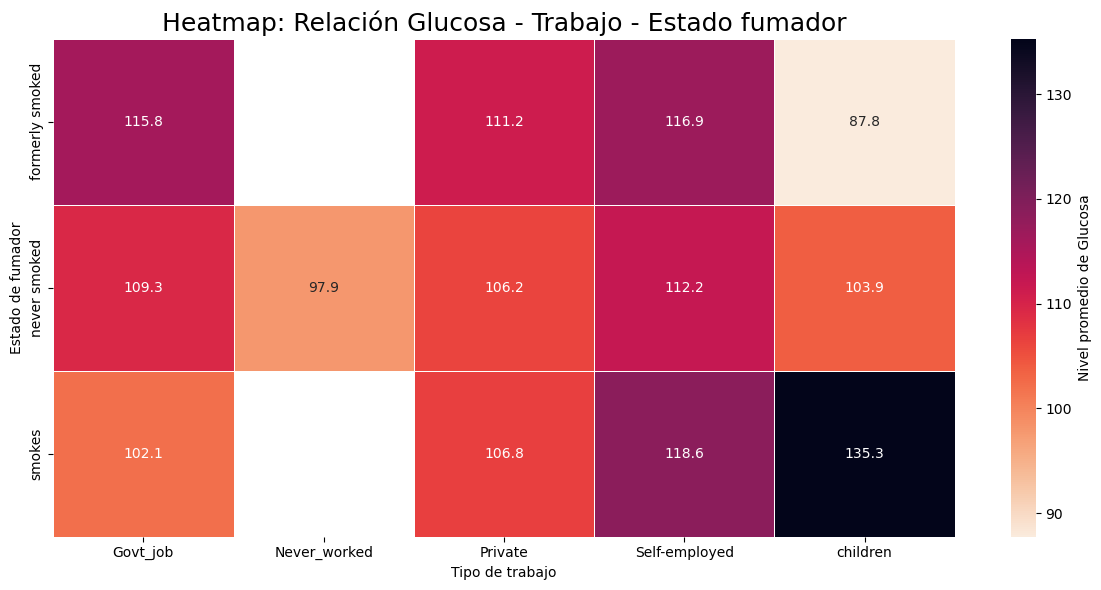

In [31]:
# Pivotando tabla para data de Heatmap

heatmap_data = clean_subset.pivot_table(
    values='avg_glucose_level',
    index='smoking_status',
    columns='work_type',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))

# Gerando el Heatmap

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="rocket_r",
    linewidths=.5,
    cbar_kws={'label': 'Nivel promedio de Glucosa'}
)

plt.title('Heatmap: Relación Glucosa - Trabajo - Estado fumador', fontsize=18)
plt.xlabel('Tipo de trabajo')
plt.ylabel('Estado de fumador')
plt.tight_layout()
plt.show()

## Comparación de gráficos tomando en cuenta público objetivo
Consideramos que el Heatmap resulta mas efectivo a la hora de brindar información, ya que da valores exactamos lo cual ayuda a identificar los riesgos y es importante para el área objetivo de estos gráficos. Además es visualmente más limpio lo cual auyuda a transmitir información de forma más rápida y eficaz. Al ser un gráfico de calor en comparación de uno de barras se puede señalar inmediatamente dónde se concentran los niveles de glucosa más altos por la intensidad del color (Por ejemplo: colores más oscuros igual a niveles de glucosa más altos), sin necesidad de comprar alturas como en el gráfico de barras.